# Задача: построить модель, которая будет предсказывать вероятность закрытия кредита раньше половины срока.

In [249]:
import pandas as pd; pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [250]:
import pandas as pd
data1 = pd.read_csv('data_for_prediction.csv', sep=';')

## Описание переменных :
account_rk - уникальный номер кредитного счета\
utilization_dt - дата начала использования кредита\
credit_type - тип кредита\
duration - текущий срок жизни кредита\
deb_coming - сумма поступлений на дебетовую карту\
deb_transactions - сумма транзакций с дебетовой карты\
insurance_payment - платежи по страховке\
mob_days - кол-во дней, в которых использовалось мобильное приложение\
tarif_type - тип тарифа\
monthly_income_amt - доход\
rp - размер регулярного платежа по кредиту\
initial_term - изначальный срок по кредиту\
sum_approved - одобренная сумма кредита\
approv_vs_request - отношение одобренной суммы к запрошенной\
loyalty_coeff - коэффициент лояльности клиента\
segment - сегмент\
closed_flg - флаг закрытия кредита\
pd_model_new_norm- вероятность дефолта кредита

In [251]:
data1.head()

,account_rk,utilization_dt,credit_type,duration,deb_coming,deb_transactions,insurance_payment,mob_days,tarif_type,monthly_income_amt,rp,initial_term,sum_approved,approv_vs_request,loyalty_coeff,segment,closed_flg,pd_model
0,289097.0,23.09.2018,1,21.0,40814.0,-7191.0,0.0,10.0,one,103492.0,21716.0,36.0,530000.0,1.722223,0.0000,4.0,0.0,0.035133
1,393796.0,27.11.2019,1,12.0,76528.0,12532.0,0.0,23.0,not_one,80094.0,11486.0,32.0,225000.0,-0.663957,0.0000,4.0,0.0,0.026019
2,539112.0,25.09.2020,1,1.0,49854.0,28671.0,0.0,31.0,one,94485.0,17008.0,38.0,280000.0,-0.675823,0.2306,4.0,0.0,0.005385
3,261769.0,11.07.2018,1,28.0,-6453.0,8454.0,0.0,3.0,not_one,63285.0,8925.0,38.0,230000.0,3.689388,0.0000,4.0,0.0,0.014340
4,350912.0,28.05.2019,1,5.0,11070.0,-9936.0,0.0,19.0,one,66232.0,9990.0,39.0,155000.0,-0.276433,0.0000,4.0,0.0,0.059922


Сделаем новый фрейм

In [252]:
#deb_coming - переводы на дебетовую на карту(то, что откладываем на кредит)
#rp - регулярный платеж по кредиту
#sum_approved - сумма кредита
#monthly_income_amt - доход 

data1['deb_com_rp'] = data1['deb_coming'] / data1['rp']

data1['deb_com_sum'] = data1['deb_coming'] / data1['sum_approved']

data1['deb_com_inc'] = data1['deb_coming'] / data1['monthly_income_amt']

Перекодируем тарифы в 1, остальные в 0

In [253]:
sub_map = {'not_one':0,
 'one':1}
data1.tarif_type = data1.tarif_type.map(sub_map)

#Исключим наблюдения по счетам клиентов, чей срок кредита уже превысил половину
data = data1.loc[(data1['duration']/data1['initial_term']<=0.5)&(data1['closed_flg']==0)|data1['closed_flg']==1]
data.head()

,account_rk,utilization_dt,credit_type,duration,deb_coming,deb_transactions,insurance_payment,mob_days,tarif_type,monthly_income_amt,rp,initial_term,sum_approved,approv_vs_request,loyalty_coeff,segment,closed_flg,pd_model,deb_com_rp,deb_com_sum,deb_com_inc
1,393796.0,27.11.2019,1,12.0,76528.0,12532.0,0.0,23.0,0,80094.0,11486.0,32.0,225000.0,-0.663957,0.0000,4.0,0.0,0.026019,6.662720,0.340124,0.955477
2,539112.0,25.09.2020,1,1.0,49854.0,28671.0,0.0,31.0,1,94485.0,17008.0,38.0,280000.0,-0.675823,0.2306,4.0,0.0,0.005385,2.931209,0.178050,0.527639
4,350912.0,28.05.2019,1,5.0,11070.0,-9936.0,0.0,19.0,1,66232.0,9990.0,39.0,155000.0,-0.276433,0.0000,4.0,0.0,0.059922,1.108108,0.071419,0.167140
6,459032.0,25.03.2020,1,10.0,32579.0,-11872.0,0.0,14.0,1,45033.0,11617.0,42.0,425000.0,-0.275936,0.2563,3.0,0.0,0.018379,2.804425,0.076656,0.723447
7,340087.0,23.04.2019,1,13.0,14862.0,-4762.0,0.0,4.0,1,57139.0,17120.0,41.0,95000.0,-0.260517,0.0000,4.0,1.0,0.023851,0.868107,0.156442,0.260103


## Распределение переменных

In [254]:
def plot(data):
    plt.hist(data,color = 'green', edgecolor = 'black', bins = int(180/3))
    plt.title('Распределение метрики')
    plt.xlabel('Значение метрики')
    plt.ylabel('Кол-во')
    plt.show()

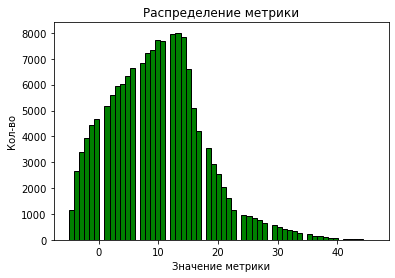

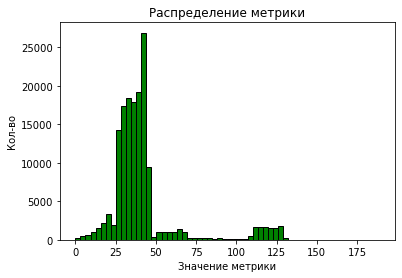

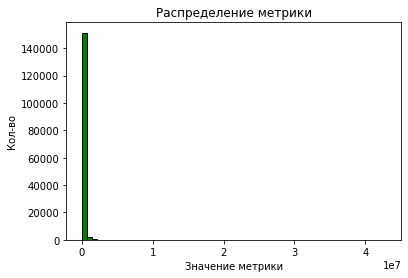

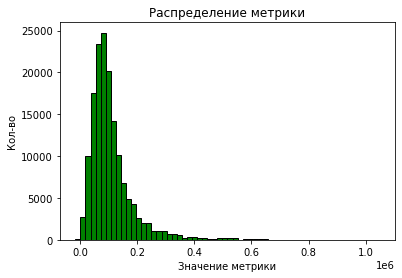

In [255]:
plot(data.duration)
plot(data.initial_term)
plot(data.deb_coming)
plot(data.monthly_income_amt)

## Удаление пропусков и выбросов

In [256]:
a = data[(data['insurance_payment']>0)]
b = data[(data['deb_coming']>0)]
c = data[(data['deb_transactions']>0)]

153744
127862


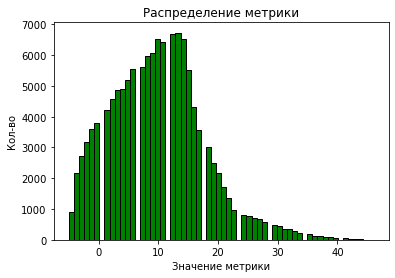

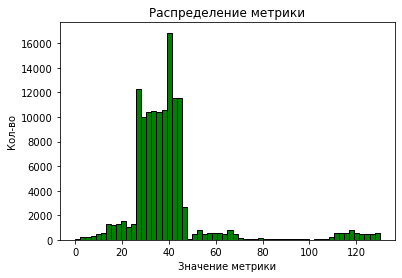

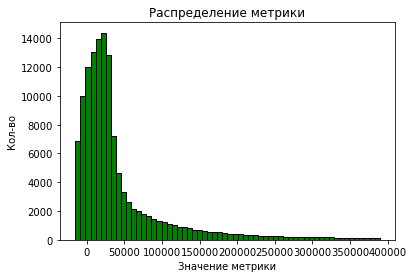

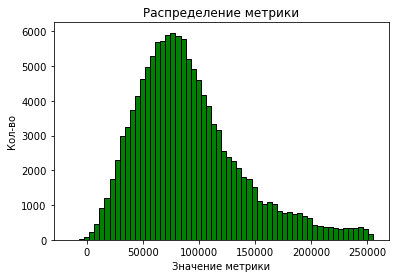

In [257]:
new = data[(data['insurance_payment'] <= a.insurance_payment.quantile(q=0.95))&(data['deb_coming'] <= b.deb_coming.quantile(q=0.95))&(data['deb_transactions'] <= b.deb_transactions.quantile(q=0.95))&(data['monthly_income_amt'] <= data.monthly_income_amt.quantile(q=0.95))&(data['rp'] <= data.rp.quantile(q=0.95))&(data['sum_approved'] <= data.sum_approved.quantile(q=0.95))]
print(len(data))
print(len(new))
plot(new.duration)
plot(new.initial_term)
plot(new.deb_coming)
plot(new.monthly_income_amt)

## Формулировка целевой переменной

In [258]:
#рассматриваем закрытые кредиты
df = new.loc[(new['closed_flg']==1)]
df.reset_index(drop=True, inplace = True)


In [259]:
df.head()

,account_rk,utilization_dt,credit_type,duration,deb_coming,deb_transactions,insurance_payment,mob_days,tarif_type,monthly_income_amt,rp,initial_term,sum_approved,approv_vs_request,loyalty_coeff,segment,closed_flg,pd_model,deb_com_rp,deb_com_sum,deb_com_inc
0,340087.0,23.04.2019,1,13.0,14862.0,-4762.0,0.00,4.0,1,57139.0,17120.0,41.0,95000.0,-0.260517,0.0000,4.0,1.0,0.023851,0.868107,0.156442,0.260103
1,582704.0,11.11.2020,1,-3.0,158133.0,22117.0,0.00,11.0,0,181896.0,16206.0,31.0,545000.0,1.243841,0.5935,1.0,1.0,0.090704,9.757682,0.290152,0.869359
2,258724.0,10.07.2018,1,21.0,230122.0,46087.0,0.00,11.0,1,86518.0,11031.0,44.0,285000.0,-0.237725,0.0000,4.0,1.0,0.009187,20.861391,0.807446,2.659816
3,334569.0,28.04.2019,1,11.0,4142.0,-157.0,0.00,11.0,1,77091.0,5748.0,34.0,-0.0,2.661245,0.0000,3.0,1.0,0.016982,0.720598,-inf,0.053729
4,457017.0,20.03.2020,1,-2.0,135960.0,19259.0,50261.48,30.0,0,83072.0,5607.0,17.0,25000.0,2.709065,0.5816,1.0,1.0,0.072909,24.248261,5.438400,1.636653


In [260]:
#добавили столбец probability,где 1, когда закрыт до половины срока, а 0, иначе
df['probability'] = np.where(df['duration'][i]/df['initial_term'][i] <= 0.5,1,0)
df['probability'] = probability
len(df)

<ipython-input-260-469a974ebbb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['probability'] = np.where(df['duration'][i]/df['initial_term'][i] <= 0.5,1,0)
<ipython-input-260-469a974ebbb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['probability'] = probability


32086

In [261]:
df.head()

,account_rk,utilization_dt,credit_type,duration,deb_coming,deb_transactions,insurance_payment,mob_days,tarif_type,monthly_income_amt,rp,initial_term,sum_approved,approv_vs_request,loyalty_coeff,segment,closed_flg,pd_model,deb_com_rp,deb_com_sum,deb_com_inc,probability
0,340087.0,23.04.2019,1,13.0,14862.0,-4762.0,0.00,4.0,1,57139.0,17120.0,41.0,95000.0,-0.260517,0.0000,4.0,1.0,0.023851,0.868107,0.156442,0.260103,1
1,582704.0,11.11.2020,1,-3.0,158133.0,22117.0,0.00,11.0,0,181896.0,16206.0,31.0,545000.0,1.243841,0.5935,1.0,1.0,0.090704,9.757682,0.290152,0.869359,1
2,258724.0,10.07.2018,1,21.0,230122.0,46087.0,0.00,11.0,1,86518.0,11031.0,44.0,285000.0,-0.237725,0.0000,4.0,1.0,0.009187,20.861391,0.807446,2.659816,1
3,334569.0,28.04.2019,1,11.0,4142.0,-157.0,0.00,11.0,1,77091.0,5748.0,34.0,-0.0,2.661245,0.0000,3.0,1.0,0.016982,0.720598,-inf,0.053729,1
4,457017.0,20.03.2020,1,-2.0,135960.0,19259.0,50261.48,30.0,0,83072.0,5607.0,17.0,25000.0,2.709065,0.5816,1.0,1.0,0.072909,24.248261,5.438400,1.636653,1


In [262]:
#строка для себя
data.loc[(data['closed_flg']==0)& (data['duration']/data['initial_term']<=0.5)]

,account_rk,utilization_dt,credit_type,duration,deb_coming,deb_transactions,insurance_payment,mob_days,tarif_type,monthly_income_amt,rp,initial_term,sum_approved,approv_vs_request,loyalty_coeff,segment,closed_flg,pd_model,deb_com_rp,deb_com_sum,deb_com_inc
1,393796.0,27.11.2019,1,12.0,76528.0,12532.0,0.0,23.0,0,80094.0,11486.0,32.0,225000.0,-0.663957,0.0000,4.0,0.0,0.026019,6.662720,0.340124,0.955477
2,539112.0,25.09.2020,1,1.0,49854.0,28671.0,0.0,31.0,1,94485.0,17008.0,38.0,280000.0,-0.675823,0.2306,4.0,0.0,0.005385,2.931209,0.178050,0.527639
4,350912.0,28.05.2019,1,5.0,11070.0,-9936.0,0.0,19.0,1,66232.0,9990.0,39.0,155000.0,-0.276433,0.0000,4.0,0.0,0.059922,1.108108,0.071419,0.167140
6,459032.0,25.03.2020,1,10.0,32579.0,-11872.0,0.0,14.0,1,45033.0,11617.0,42.0,425000.0,-0.275936,0.2563,3.0,0.0,0.018379,2.804425,0.076656,0.723447
8,351471.0,26.07.2019,1,5.0,104116.0,127638.0,0.0,19.0,1,52308.0,18728.0,45.0,520000.0,-0.580683,0.0000,1.0,0.0,0.041785,5.559376,0.200223,1.990441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209799,375215.0,08.08.2019,1,15.0,56596.0,7994.0,0.0,32.0,1,145059.0,20541.0,34.0,335000.0,2.950345,0.0000,1.0,0.0,0.026298,2.755270,0.168943,0.390158
209800,403174.0,17.11.2019,1,8.0,15060.0,12186.0,0.0,16.0,0,124682.0,12962.0,27.0,245000.0,3.381394,0.0000,2.0,0.0,0.003915,1.161858,0.061469,0.120787
209801,376079.0,13.08.2019,1,16.0,-7525.0,5656.0,0.0,17.0,1,42414.0,5656.0,34.0,-30000.0,1.295852,0.0000,3.0,0.0,0.009465,-1.330446,0.250833,-0.177418
209803,421299.0,27.12.2019,1,12.0,84928.0,12882.0,2000.0,4.0,1,72298.0,13619.0,32.0,400000.0,-0.524158,0.2633,3.0,0.0,0.064074,6.235994,0.212320,1.174694


## Разделение выборки на обучающую и тестовую

In [263]:
#Формируем обучающую выборку(train и test)
print('Число клиентов, закрывших кредит до середины срока:', len(df.loc[df['probability']==1]))
print('Число клиентов, закрывших кредит после середины срока:', len(df.loc[df['probability']==0]))
print('Отношение классов:', len(df.loc[df['probability']==0])/len(df.loc[df['probability']==1]))

Число клиентов, закрывших кредит до середины срока: 20472
Число клиентов, закрывших кредит после середины срока: 11614
Отношение классов: 0.5673114497850723


In [264]:
#Видим, что отношение классов 0.5.Значит,необходимо сбалансировать выборки. 
#Выберем случайным образом 50% наблюдений с probability = 1

sample1 = df.loc[df['probability']==1].sample(frac = 0.5)
sample2 = df.loc[df['probability']==0]
sample = pd.concat([sample1,sample2], ignore_index = True, sort = False)

In [265]:
#приводим значения к нужному типу
sample.replace([np.inf,-np.inf], np.nan, inplace = True)
sample.dropna(inplace = True)
sample.drop('utilization_dt', axis = 1, inplace = True)
sample = sample.astype(np.float32)

In [266]:
#Отложенная выборка:x - вектор значений признаков, y - вектор со значениями целевой переменной
x = sample[['account_rk','credit_type','duration','deb_coming','deb_transactions','insurance_payment','mob_days','tarif_type','monthly_income_amt','rp','initial_term','sum_approved','approv_vs_request','loyalty_coeff','segment','pd_model','deb_com_rp','deb_com_sum','deb_com_inc']].values
y = sample.probability.values

## Обучение модели 

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state=3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## Проверка качества(насколько хорошо работает предсказатель)

In [268]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2583  356]
 [ 238 2827]]
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      2939
         1.0       0.89      0.92      0.90      3065

    accuracy                           0.90      6004
   macro avg       0.90      0.90      0.90      6004
weighted avg       0.90      0.90      0.90      6004



## ROC-AUC

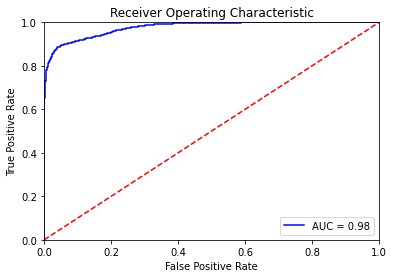

In [269]:
# TEST
import sklearn.metrics as metrics
probs = regressor.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



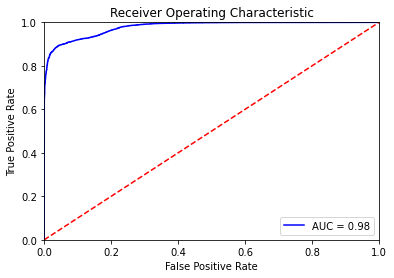

In [270]:
# TRAIN
probs = regressor.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Значимость переменных

In [271]:
c = regressor.feature_importances_
for i,v in enumerate(c):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.15316
Feature: 1, Score: 0.01195
Feature: 2, Score: 0.55038
Feature: 3, Score: 0.00143
Feature: 4, Score: 0.00225
Feature: 5, Score: 0.00319
Feature: 6, Score: 0.00285
Feature: 7, Score: 0.00050
Feature: 8, Score: 0.00100
Feature: 9, Score: 0.00174
Feature: 10, Score: 0.11821
Feature: 11, Score: 0.01228
Feature: 12, Score: 0.00087
Feature: 13, Score: 0.12645
Feature: 14, Score: 0.00745
Feature: 15, Score: 0.00083
Feature: 16, Score: 0.00166
Feature: 17, Score: 0.00268
Feature: 18, Score: 0.00113


## Интерпретация результатов: 
Построена модель, которая будет предсказывать вероятность закрытия кредита раньше половины срока. Значения precision и recall совпадают с ожидаемыми; кривые ROC-AUC хорошие, и их площади для TRAIN и TEST совпадают. Отсюда можно сделать вывод, что модель работает достаточно точно.

Проанализировав значимость переменных, можно заметить, что Feature 2 выбивается, но это нормально, так как это duration(текущий срок жизни кредита), а по нему почти сразу можно определить, успеет ли клиент закрыть кредит до половины срока. 